In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
# === Загрузка признаков ===
df = pd.read_csv("../data/processed/features.csv")

In [18]:
# === Целевая переменная и признаки ===
X = df.drop(columns=["accessible", "accessible.1", "stop_global_id", "stop_global_id.1", "FullName", "sport_global_id", "station_name"])
X = X.select_dtypes(include=["int64", "float64"])  # только числовые признаки
y = df["accessible"]

In [19]:
# === Разделение данных ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# === Базовая модель ===
base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

print("[INFO] Accuracy (base model):", accuracy_score(y_test, y_pred))
print("[INFO] Classification report (base model):")
print(classification_report(y_test, y_pred))

[INFO] Accuracy (base model): 1.0
[INFO] Classification report (base model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        43

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



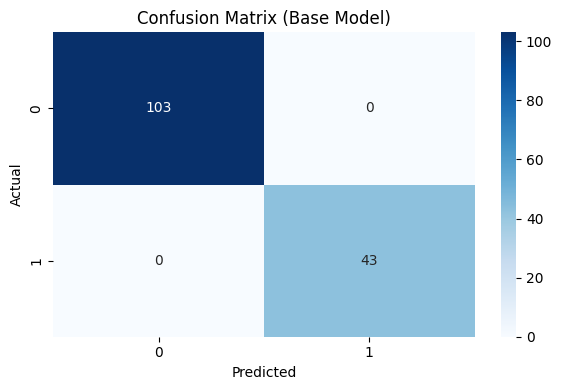

In [21]:
# === Визуализация матрицы ошибок ===
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_confusion(y_test, y_pred, "Confusion Matrix (Base Model)")

In [22]:
# === RandomizedSearchCV для подбора гиперпараметров ===
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[INFO] Accuracy (best model): 1.0
[INFO] Classification report (best model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        43

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



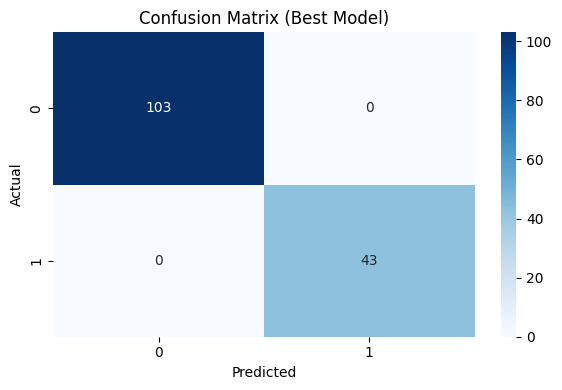

In [23]:
# === Оценка лучшей модели ===
y_pred_best = best_model.predict(X_test)
print("[INFO] Accuracy (best model):", accuracy_score(y_test, y_pred_best))
print("[INFO] Classification report (best model):")
print(classification_report(y_test, y_pred_best))
plot_confusion(y_test, y_pred_best, "Confusion Matrix (Best Model)")

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation accuracy scores: [0.97945205 1.         1.         1.         0.97241379]
Mean CV accuracy: 0.9903731695795936


In [27]:
import joblib
os.makedirs("../models", exist_ok=True)
joblib.dump(model, "../models/random_forest_accessibility.pkl")


['../models/random_forest_accessibility.pkl']